# INFO 3401 - Information Exploration Final Project
## Erica Lee | Fall 2020 | December 14, 2020

## Research Question

How has COVID-19 affected the sales revenue generated by medical and recreational marijuana in Boulder County? 

### Motivation

Marijuana, both medical and recreational, is undoubtedly a very large source of revenue to Colorado's economy. With COVID-19's heavy impacts on the economy, it's worth looking at if (and how) the pandemic has changed marijuana sales within our county. While the cannabis industry is its own sector, it may also be able to speak to how the economy has been holding up throughout the past 8 months. 

### Hypothesis

I think that there has been an positive impact on the marijuana industry and its sales ever since the pandemic began. It could be due to more people looking for a way to relieve stress due to the other impacts of COVID-19 on their lives, due to unemployment or loss of a loved one. Additionally, marijuana sales have been growing rapidly every year since legalization in 2014, so it could just be continuing that growth. In addition, marijuana businesses were considered essential during shutdowns, so dispensaries never had to close. 
I predict that Boulder has been doing well in comparison to other counties nearby, as we have a pretty concentrated population of active users. 

In [17]:
import pandas as pd
import numpy as np

from matplotlib.ticker import FuncFormatter
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sb

## COVID-19 Data

**Source:** https://data-cdphe.opendata.arcgis.com/datasets/cdphe-covid19-county-level-open-data-repository

In [18]:
raw_covid_df = pd.read_csv('covid19_data.csv')

raw_covid_df.rename(columns = {'COUNTY':'county','LABEL':'label','FULL_':'full','FIPS':'fips','POP':'pop',
                               'Desc_':'desc','Metric':'metric','Value':'value','Rate':'rate','Date':'date'},
                    inplace=True)

In [19]:
raw_covid_df.head()

,county,label,full,fips,pop,desc,metric,value,rate,date,ObjectId
0,ADAMS,Adams,Adams County,1.0,511473.0,Cases of COVID-19 in Colorado by County,Cases,8.0,NaN,03/17/2020,1
1,ADAMS,Adams,Adams County,1.0,511473.0,"Case Rates Per 100,000 People in Colorado by C...","Rate Per 100,000",NaN,1.6,03/17/2020,2
2,ARAPAHOE,Arapahoe,Arapahoe County,5.0,651342.0,Cases of COVID-19 in Colorado by County,Cases,18.0,NaN,03/17/2020,3
3,ARAPAHOE,Arapahoe,Arapahoe County,5.0,651342.0,"Case Rates Per 100,000 People in Colorado by C...","Rate Per 100,000",NaN,2.8,03/17/2020,4
4,BOULDER,Boulder,Boulder County,13.0,325476.0,Cases of COVID-19 in Colorado by County,Cases,8.0,NaN,03/17/2020,5


In [20]:
raw_covid_df.columns

Index(['county', 'label', 'full', 'fips', 'pop', 'desc', 'metric', 'value',
       'rate', 'date', 'ObjectId'],
      dtype='object')

In [21]:
boulder_covid_df = raw_covid_df[(raw_covid_df['county'] == 'BOULDER') &
                                (raw_covid_df['desc'] == 'Cases of COVID-19 in Colorado by County')]
# filter the dataframe for only boulder county rows, and rows that contain the number of cases per county

boulder_covid_df.head()

,county,label,full,fips,pop,desc,metric,value,rate,date,ObjectId
4,BOULDER,Boulder,Boulder County,13.0,325476.0,Cases of COVID-19 in Colorado by County,Cases,8.0,NaN,03/17/2020,5
41,BOULDER,Boulder,Boulder County,13.0,325476.0,Cases of COVID-19 in Colorado by County,Cases,7.0,NaN,03/18/2020,42
81,BOULDER,Boulder,Boulder County,13.0,325476.0,Cases of COVID-19 in Colorado by County,Cases,37.0,NaN,03/22/2020,82
123,BOULDER,Boulder,Boulder County,13.0,325476.0,Cases of COVID-19 in Colorado by County,Cases,16.0,NaN,03/20/2020,124
180,BOULDER,Boulder,Boulder County,13.0,325476.0,Cases of COVID-19 in Colorado by County,Cases,11.0,NaN,03/19/2020,181


In [22]:
boulder_covid_cases = boulder_covid_df.drop(columns = ['label','full','fips','desc','pop',
                                                       'rate', 'ObjectId']).sort_values('date',ascending=True)
# drop unnecessary columns

boulder_covid_cases.head()

,county,metric,value,date
4,BOULDER,Cases,8.0,03/17/2020
41,BOULDER,Cases,7.0,03/18/2020
180,BOULDER,Cases,11.0,03/19/2020
123,BOULDER,Cases,16.0,03/20/2020
222,BOULDER,Cases,30.0,03/21/2020


In [23]:
boulder_covid_cases['year'] = pd.DatetimeIndex(boulder_covid_cases['date']).year
# make a new column with just the year

boulder_covid_cases['month'] = pd.DatetimeIndex(boulder_covid_cases['date']).month
# make a new column with just the month

boulder_covid_cases['diff'] = boulder_covid_cases['value'].diff()
# find the difference in cases from the previous day

boulder_covid_cases.tail()

,county,metric,value,date,year,month,diff
93636,BOULDER,Cases,7974.0,11/13/2020,2020,11,289.0
94145,BOULDER,Cases,8266.0,11/14/2020,2020,11,292.0
94588,BOULDER,Cases,8435.0,11/15/2020,2020,11,169.0
95521,BOULDER,Cases,8583.0,11/16/2020,2020,11,148.0
95825,BOULDER,Cases,8791.0,11/17/2020,2020,11,208.0


In [24]:
cases_by_month = pd.pivot_table(data = boulder_covid_cases, 
               values = 'diff', 
               index = 'month', 
               aggfunc = 'sum')
cases_by_month

,diff
month,
3,99.0
4,473.0
5,400.0
6,404.0
7,488.0
8,428.0
9,2135.0
10,1435.0
11,2921.0


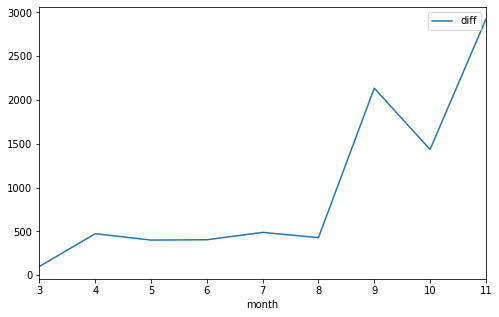

In [62]:
cases_by_month.plot(figsize=(8,5))

## Marijuana Sales Data

**Source:** https://data.colorado.gov/Revenue/Marijuana-Sales-Revenue-in-Colorado/j7a3-jgd3

In [26]:
marijuana_df = pd.read_csv('marijuana_sales_co.csv')

marijuana_df.rename(columns = {'Month':'month','Year':'year','County':'county','Med_Sales':'medical',
                               'Rec_Sales':'recreational','Med_Blank_Code':'med code',
                               'Rec_Blank_Code':'rec code'}, inplace=True)
marijuana_df.head()

,month,year,county,medical,recreational,med code,rec code,ID
0,12,2019,Yuma,NaN,NaN,NL,NL,122019Yuma
1,12,2019,Weld,314840.0,2448689.0,NaN,NaN,122019Weld
2,12,2019,Washington,NaN,NaN,NL,NL,122019Washington
3,12,2019,Teller,NaN,NaN,NL,NL,122019Teller
4,12,2019,Summit,NaN,2476854.0,NR,NaN,122019Summit


In [27]:
marijuana_df.columns

Index(['month', 'year', 'county', 'medical', 'recreational', 'med code',
       'rec code', 'ID'],
      dtype='object')

### Boulder County Marijuana Data

In [28]:
boulder_marijuana_df = marijuana_df[(marijuana_df['county'] == 'Boulder')]
# create a new dataframe for just Boulder County by filtering the original dataframe

boulder_marijuana_df.tail()

,month,year,county,medical,recreational,med code,rec code,ID
4785,5,2020,Boulder,1258072.0,10018004.0,NaN,NaN,52020Boulder
4867,6,2020,Boulder,1306408.0,10759641.0,NaN,NaN,62020Boulder
4879,7,2020,Boulder,1309949.0,12593191.0,NaN,NaN,72020Boulder
4958,8,2020,Boulder,1356988.0,12547631.0,NaN,NaN,82020Boulder
5050,9,2020,Boulder,1356988.0,12547631.0,NaN,NaN,92020Boulder


In [29]:
boulder_marijuana_sales = boulder_marijuana_df.drop(columns=['med code','rec code','ID'])
# drop unnecessary columns

In [30]:
boulder_marijuana_sales['total'] = boulder_marijuana_sales['medical'] + boulder_marijuana_sales['recreational'] 
# create a new column for the total revenue generated by adding the medical and recreational sales

total_sales = boulder_marijuana_sales.query('year == 2020')
# only get the data for 2020

total_sales

,month,year,county,medical,recreational,total
4548,1,2020,Boulder,1154221.0,8048704.0,9202925.0
4583,2,2020,Boulder,1085220.0,7920664.0,9005884.0
4649,3,2020,Boulder,1208727.0,9141582.0,10350309.0
4706,4,2020,Boulder,1157461.0,8099503.0,9256964.0
4785,5,2020,Boulder,1258072.0,10018004.0,11276076.0
4867,6,2020,Boulder,1306408.0,10759641.0,12066049.0
4879,7,2020,Boulder,1309949.0,12593191.0,13903140.0
4958,8,2020,Boulder,1356988.0,12547631.0,13904619.0
5050,9,2020,Boulder,1356988.0,12547631.0,13904619.0


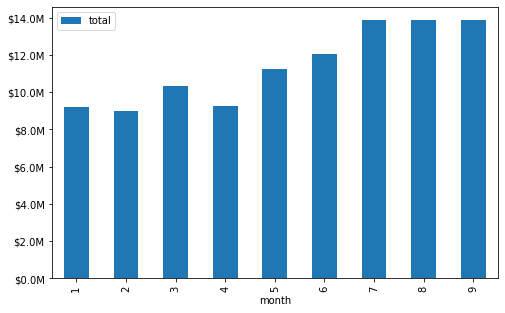

In [63]:
f,ax = plt.subplots(figsize=(8,5))
ax = total_sales.plot(x='month',y='total',ax=ax,kind='bar')
# ax = total_sales.plot(x='month',y='medical',ax=ax)
# ax = total_sales.plot(x='month',y='recreational',ax=ax)

# format y-axis to display sales in millions 
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)


## Preliminary Findings

Based on the data so far, it is clear that marijuana sales have maintained their continuous month-by-month growth. There was a decrease in April when the pandemic shutdowns began, which is expected. This could be due to lack of travel and more people staying at home, therefore not purchasing marijuana. In July, August and September, the sales plateaued, which could be corresponding to the slow increase in cases. According to the cases_by_month plot, there was a sharp increase in cases from August to September, which could explain why sales did not increase, but stayed the same. As COVID-19 cases kind of plateaued from May to July, marijuana sales increased. 

# Phase 2
- Revised statement of hypothesis and motivation
- Read in, describe, and summarize the data
- Present detailed analyses, visualizations, findings
- Statement of conclusion

### Revised Motivation

The sale of marijuana, both medical and recreational, is undoubtedly a very large source of revenue to Colorado's economy. Along with COVID-19's heavy impacts on the economy, it's worth looking at if (and how) the pandemic has changed marijuana sales within our very own county. While the cannabis industry is its own sector, it may also be able to speak for economic trends that have developed in the past 8 months. During these unprecedented times, making sense of the quantitative impacts of the virus can help put us back on our feet, or be more prepared for the future. 

### Revised Hypothesis

I believe that there has been a positive impact on the cannabis industry and its sales ever since the pandemic began. More people may be looking for a way to relieve stress due to the other impacts of COVID-19 on their lives, such as unemployment or loss of a loved one. Marijuana sales have been growing rapidly every year since its legalization in 2014, and because marijuana businesses were considered "essential" during initial shutdowns, dispensaries never had to close. In addition, due to pandemic guidelines, more ways to safely purchase marijuana have since been introduced, such as curbside pickup and delivery, creating ease of access to products. I predict that Boulder has been doing well in comparison to other counties nearby, as we have a pretty concentrated population of active users with the general demographic. 

In [52]:
total_sales['% medical'] = (total_sales['medical'] / total_sales['total'] * 100).round()
total_sales['% recreational'] = (total_sales['recreational'] / total_sales['total'] * 100).round()

total_sales

/Users/ericalee531/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ericalee531/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,month,year,county,medical,recreational,total,% medical,% recreational
4548,1,2020,Boulder,1154221.0,8048704.0,9202925.0,13.0,87.0
4583,2,2020,Boulder,1085220.0,7920664.0,9005884.0,12.0,88.0
4649,3,2020,Boulder,1208727.0,9141582.0,10350309.0,12.0,88.0
4706,4,2020,Boulder,1157461.0,8099503.0,9256964.0,13.0,87.0
4785,5,2020,Boulder,1258072.0,10018004.0,11276076.0,11.0,89.0
4867,6,2020,Boulder,1306408.0,10759641.0,12066049.0,11.0,89.0
4879,7,2020,Boulder,1309949.0,12593191.0,13903140.0,9.0,91.0
4958,8,2020,Boulder,1356988.0,12547631.0,13904619.0,10.0,90.0
5050,9,2020,Boulder,1356988.0,12547631.0,13904619.0,10.0,90.0


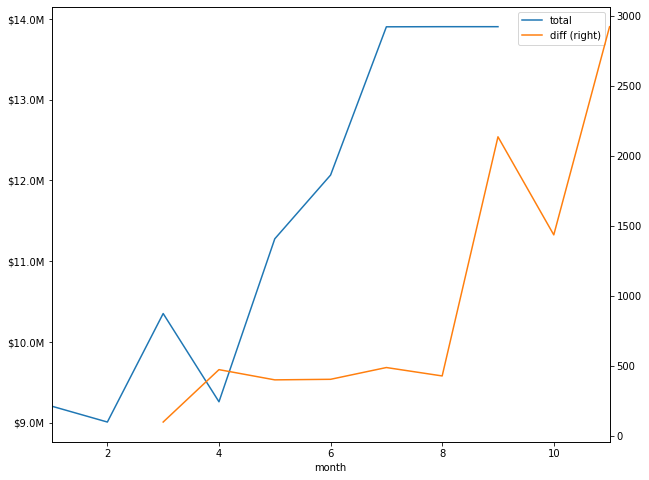

In [65]:
# graph marijuana and covid data together

fig, ax = plt.subplots(figsize=(10,8))

ax = total_sales.plot(x='month',y='total',ax=ax,kind='line')
def millions(x, pos):
    return '$%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)

ax = cases_by_month.plot(ax=ax,secondary_y=True)

In [56]:
boulder_covid_cases.head()

,county,metric,value,date,year,month,diff
4,BOULDER,Cases,8.0,03/17/2020,2020,3,NaN
41,BOULDER,Cases,7.0,03/18/2020,2020,3,-1.0
180,BOULDER,Cases,11.0,03/19/2020,2020,3,4.0
123,BOULDER,Cases,16.0,03/20/2020,2020,3,5.0
222,BOULDER,Cases,30.0,03/21/2020,2020,3,14.0


In [57]:
cases_by_month

,diff
month,
3,99.0
4,473.0
5,400.0
6,404.0
7,488.0
8,428.0
9,2135.0
10,1435.0
11,2921.0


In [ ]:
f,ax = plt.subplots(figsize=(10,8))
ax = cases_by_month.plot(ax=ax)

## Statement of Conclusions

_Based on the data so far, it is clear that marijuana sales have maintained their continuous month-by-month growth. There was a decrease in April when the pandemic shutdowns began, which is expected. This could be due to lack of travel and more people staying at home, therefore not purchasing marijuana. In July, August and September, the sales plateaued, which could be corresponding to the slow increase in cases. According to the cases_by_month plot, there was a sharp increase in cases from August to September, which could explain why sales did not increase, but stayed the same. As COVID-19 cases kind of plateaued from May to July, marijuana sales increased._

Based on data collected from the Colorado Department of Public Health regarding daily COVID-19 cases by county and monthly marijuana sales revenue data from the Colorado Information Marketplace, 